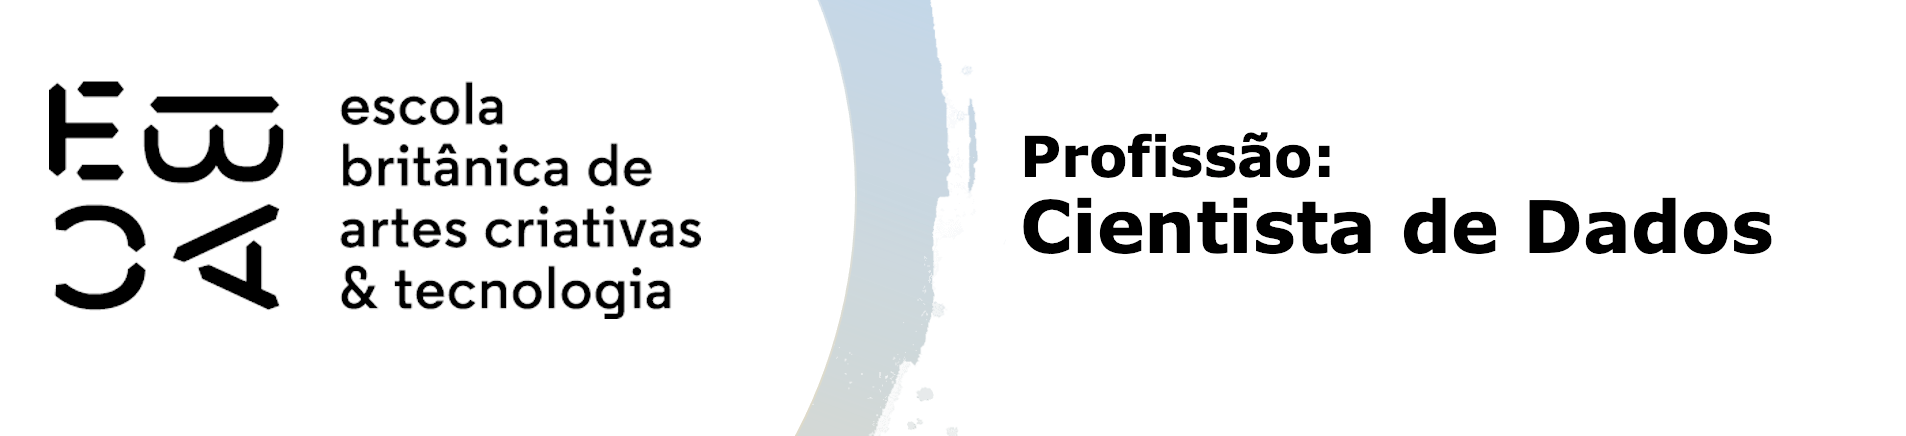

# Métodos hierárquicos de agrupamento - Tarefa

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [132]:
# Selecionando as variáveis quantitativas e eliminando dados faltantes
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

peng_num.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [133]:
# Padronizando as variáveis
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(peng_num)

# Ajustando valores da escala
peng_pad = scaler.fit_transform(peng_num)

print(f'Médias...: {peng_pad.mean(axis=0)}')
print(f'D. padrão: {peng_pad.std(axis=0)}')



Médias...: [ 1.66208827e-16 -1.41277503e-15 -8.31044135e-16  4.15522068e-17]
D. padrão: [1. 1. 1. 1.]


### Agrupamento hierárquico da base dividido em três grupos

In [134]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [135]:
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [136]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


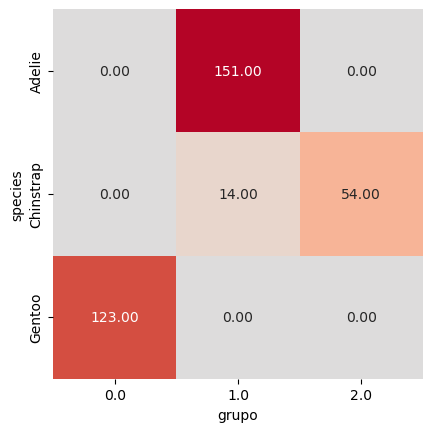

In [137]:
ct=pd.crosstab(peng['species'], peng['grupo'])
sns.heatmap(ct, cmap="coolwarm", annot=True, fmt='.2f',cbar=False,square=True,center=False);

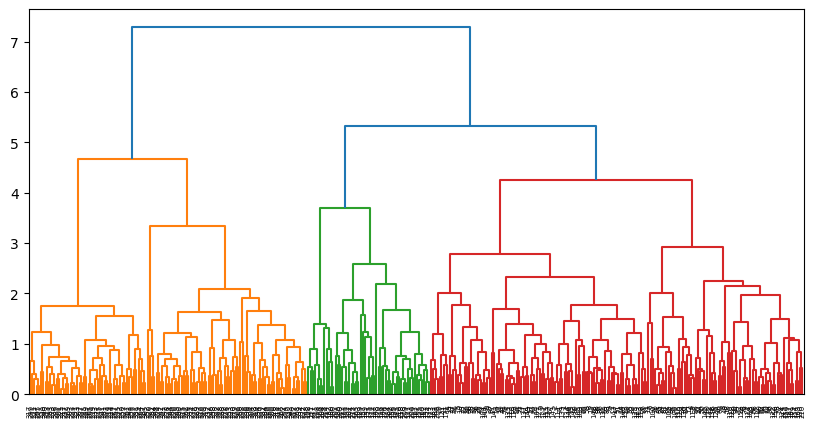

In [138]:
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [139]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


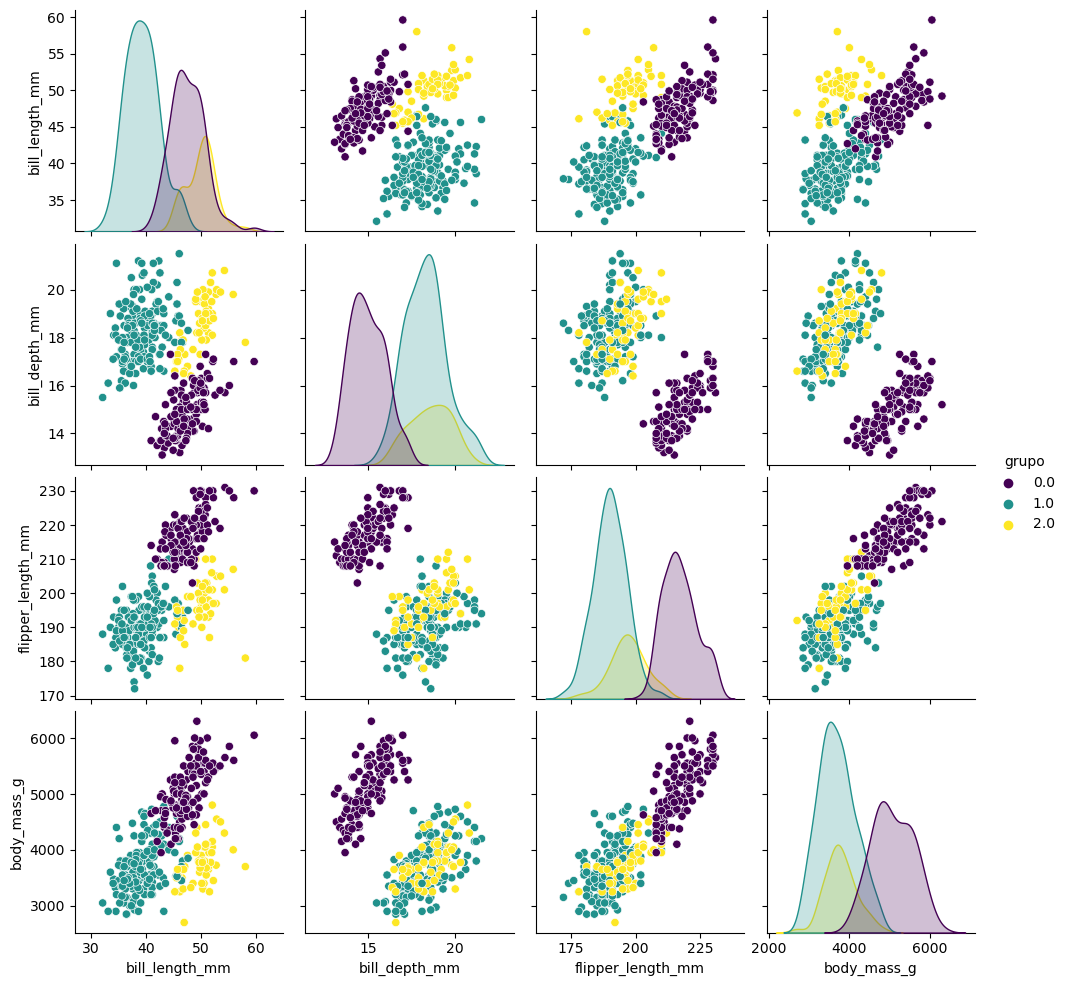

In [140]:
sns.pairplot(peng.select_dtypes(include='number'), hue='grupo',palette='viridis');

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

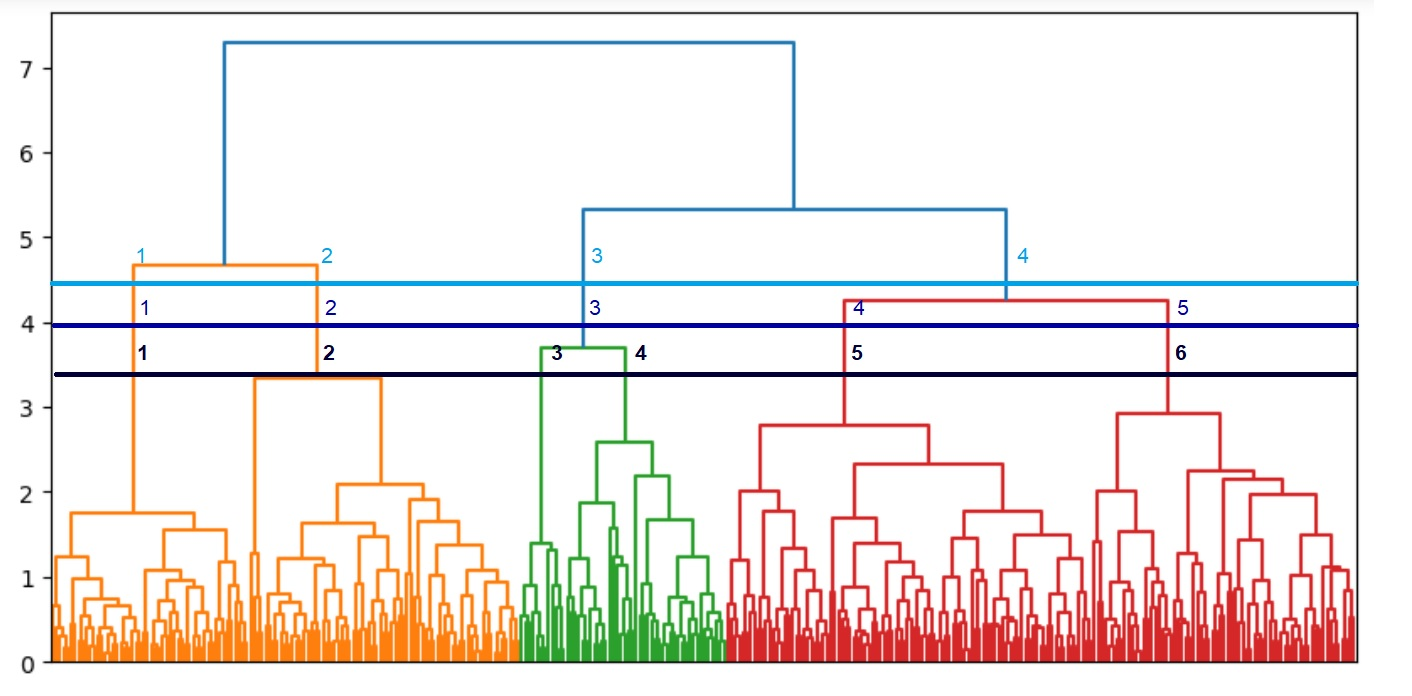
<div style="text-align: right">figura 1</div>

Número de grupos: 5


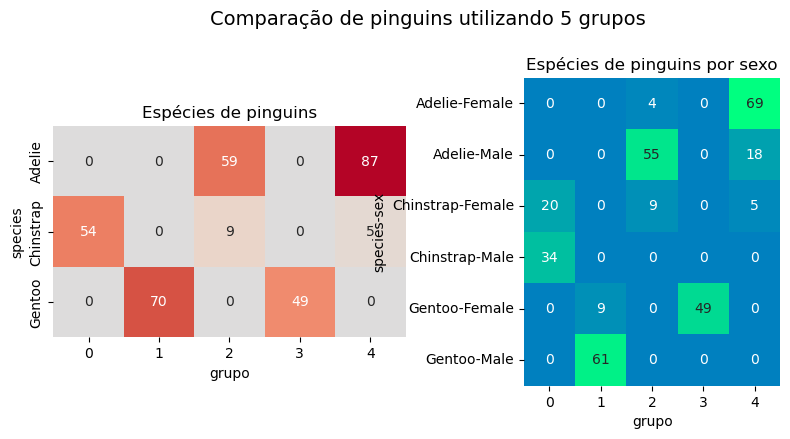

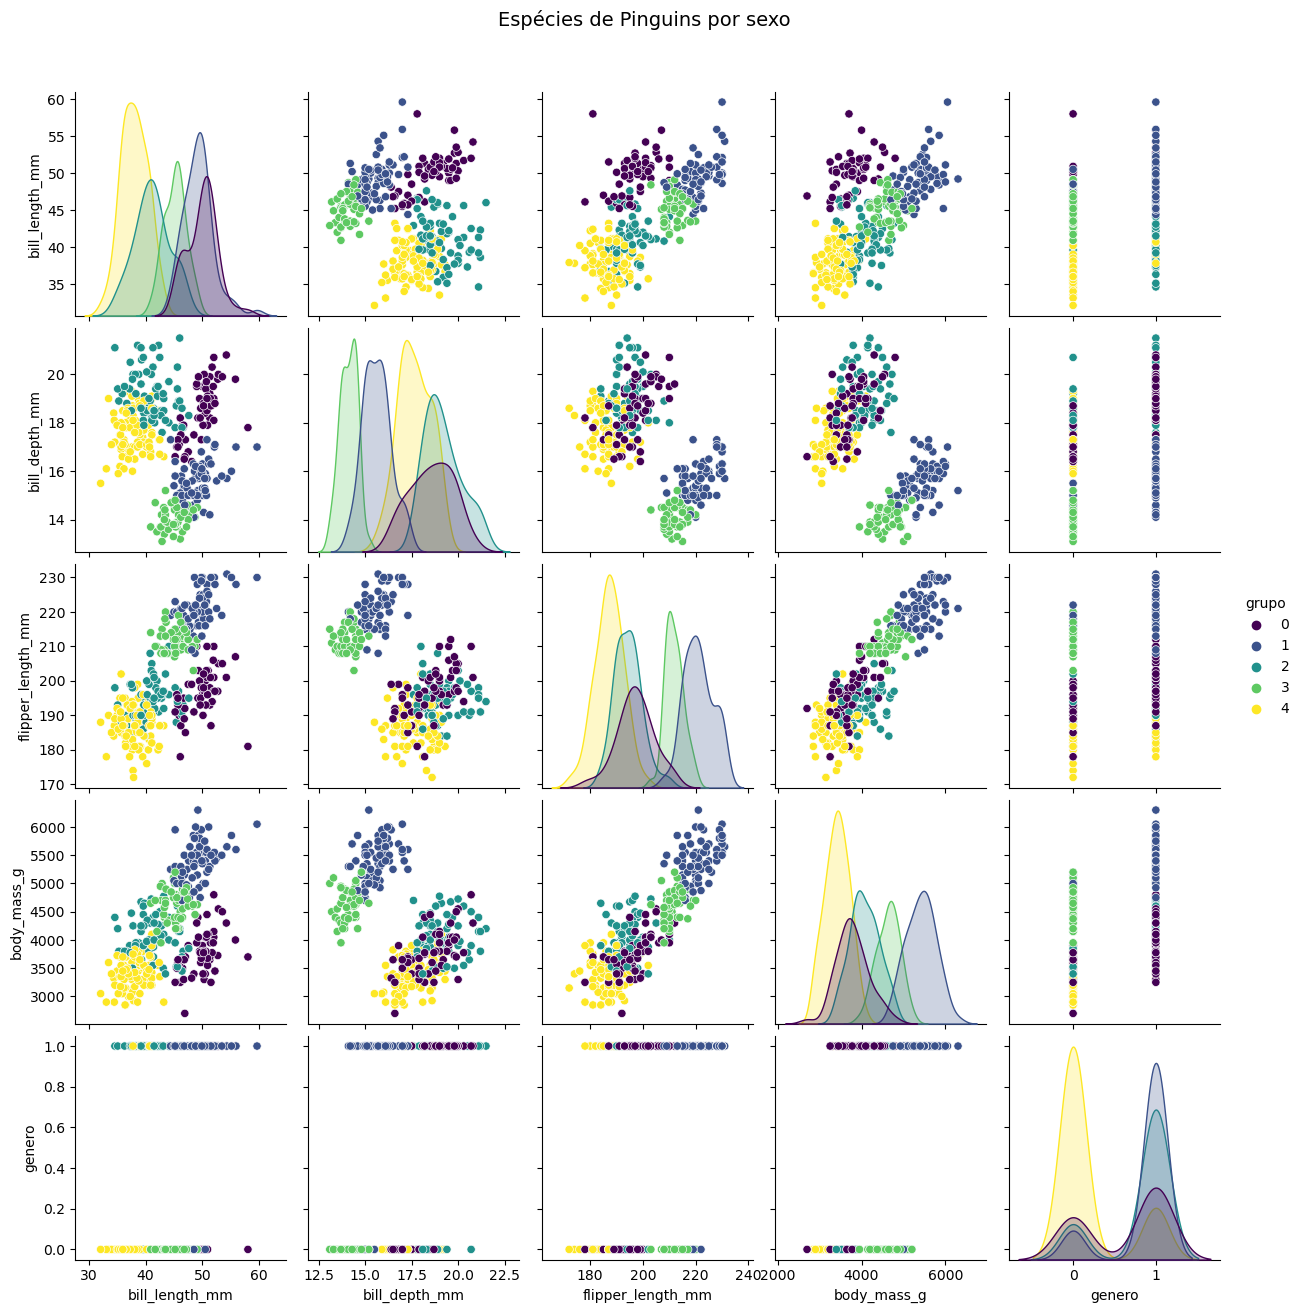

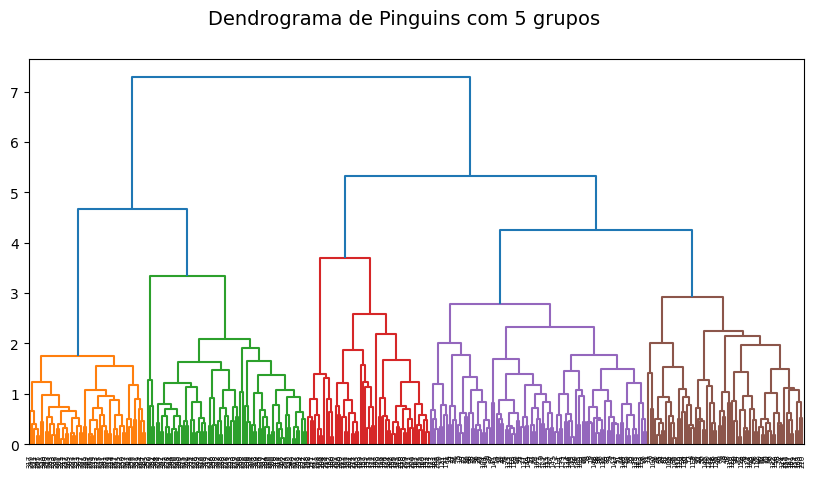

In [183]:
n = int(input(f'Número de grupos: '))
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=n)
clus.fit(peng_pad)

peng_num = peng_num.drop('grupo', axis=1)
peng_num['grupo'] = clus.labels_
peng1=peng.iloc[:,:7].dropna()
peng1 = peng1.merge(peng_num['grupo'], how='left', on='id')

#Tabelas cruzadas
ct=pd.crosstab(peng1['species'],peng1['grupo'])
ct2=pd.crosstab([peng1['species'], peng1['sex']], peng1['grupo'])

# Configuração dos gráficos
fig, axes = plt.subplots(ncols=2, figsize=(10, 4)) # Define o espaçamento horizontal entre os subplots
fig.suptitle((f'Comparação de pinguins utilizando {n} grupos'),y=1.05 ,fontsize=14)

sns.heatmap(ct, cmap="coolwarm", annot=True, fmt='.0f',cbar=False,square=True,center=False, ax=axes[0])
axes[0].set_title('Espécies de pinguins')

sns.heatmap(ct2, cmap="winter", annot=True, cbar=False,square=True,center=False, ax=axes[1])
axes[1].set_title('Espécies de pinguins por sexo')



peng1['genero'] = peng1['sex'].map({'Male':1,'Female':0})
sns.pairplot(peng1.select_dtypes(include='number'), hue='grupo',palette='viridis',dropna=True);
plt.suptitle('Espécies de Pinguins por sexo',y=1.05,fontsize=14)
plt.show() # Exibe os gráficos

plt.figure(figsize=(10, 5))
plt.suptitle(f'Dendrograma de Pinguins com {n} grupos',fontsize=14)
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'),p=30,truncate_mode='level',show_leaf_counts=True,color_threshold=3.8)


# Conclusão

Optamos por dividir a base em 5 grupos (conforme mostrado na figura 1), motivado pela divisão do grupo maior em outros dois grupos. <br> No entanto, não foram observadas mudanças de agrupamento que pudessem indicar a evidenciação de algum padrão natural dos dados, exceto por uma discreta melhora da distribuição da variável **bill_length_mm** ao ser comparada com a variável **sex** (figura 2).

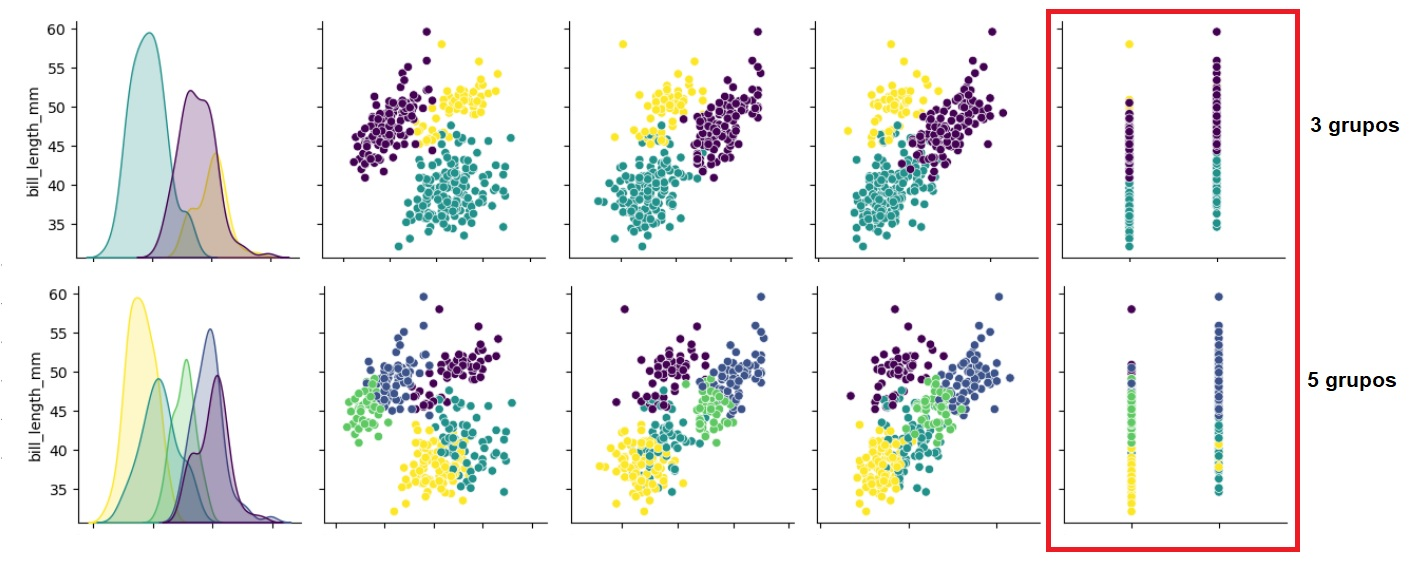
<div style="text-align: right">figura 2</div>
